In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.2
3.2.1


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



c:\Users\woute\anaconda3\python.exe


c:\Users\woute\anaconda3\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

A.1
A.2
A.3


In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Gelderland Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage'), function=<function sum_over at 0x00000128C04465C0>)
ScalarOutcome('Gelderland Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x00000128C04465C0>)
ScalarOutcome('Gelderland Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths'), function=<function sum_over at 0x00000128C04465C0>)
ScalarOutcome('Overijssel Expected Annual Damage', variable_name=('A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x00000128C04465C0>)
ScalarOutcome('Overijssel Dike Investment Costs', variable_name=('A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over at 0x00000128C04465C0>)
ScalarOutc

In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=500, policies=50)

[MainProcess/INFO] pool started with 18 workers
[MainProcess/INFO] performing 500 scenarios * 50 policies * 1 model(s) = 25000 experiments
100%|████████████████████████████████████| 25000/25000 [31:20<00:00, 13.29it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Gelderland Expected Annual Damage', 'Gelderland Dike Investment Costs', 'Gelderland Expected Number of Deaths', 'Overijssel Expected Annual Damage', 'Overijssel Dike Investment Costs', 'Overijssel Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,105,257.474447,1.0,0.363632,100.606882,1.0,0.805890,242.318296,1.5,0.651422,...,1,3,6,4,7,0,2,50,0,dikesnet
1,31,298.837805,10.0,0.031693,162.542886,1.0,0.652067,260.958509,1.5,0.154579,...,1,3,6,4,7,0,2,51,0,dikesnet
2,32,296.763543,1.5,0.358564,113.920720,1.0,0.837855,35.861965,10.0,0.390002,...,1,3,6,4,7,0,2,52,0,dikesnet
3,58,37.443626,1.0,0.290589,209.014530,1.5,0.517592,263.878427,10.0,0.162827,...,1,3,6,4,7,0,2,53,0,dikesnet
4,119,260.229939,1.5,0.348283,73.400179,1.0,0.519098,115.732080,1.0,0.357895,...,1,3,6,4,7,0,2,54,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,43,310.337880,10.0,0.133147,343.036924,1.0,0.471010,144.789117,1.0,0.927687,...,5,7,0,6,9,6,2,545,49,dikesnet
24996,121,159.283692,10.0,0.572106,212.104607,10.0,0.736756,319.627771,1.0,0.506062,...,5,7,0,6,9,6,2,546,49,dikesnet
24997,9,110.551223,1.5,0.698355,139.573038,1.5,0.534939,80.396353,1.5,0.054717,...,5,7,0,6,9,6,2,547,49,dikesnet
24998,20,36.603049,1.0,0.985747,150.574693,10.0,0.185052,138.555067,10.0,0.060625,...,5,7,0,6,9,6,2,548,49,dikesnet


In [ ]:
# Save experiments as csv file
experiments_policy=pd.DataFrame(experiments)
experiments_policy.to_csv('experiments(policy).csv', index=False)

In [ ]:
# Save outcomes as csv file
outcomes_policy=pd.DataFrame(outcomes)
outcomes_policy.to_csv('outcomes(policy).csv', index=False)

In [ ]:
# Load the earlier saved experiments and outcomes, so we don't have to run the experiments again each time
experiments_policy = pd.read_csv('experiments(policy).csv')
outcomes_policy = pd.read_csv('outcomes(policy).csv')

In [12]:
experiments_policy.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [13]:
outcomes_policy.columns

Index(['Gelderland Expected Annual Damage', 'Gelderland Dike Investment Costs',
       'Gelderland Expected Number of Deaths',
       'Overijssel Expected Annual Damage', 'Overijssel Dike Investment Costs',
       'Overijssel Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')

In [ ]:
# Concatenating experiments and outcomes into a single DataFrame
results_policy = pd.concat([experiments_policy, outcomes_policy], axis=1)

In [ ]:
# Remove irrelavant columns
columns_to_remove = ["model"]
results_policies= results_policy.drop(columns=columns_to_remove)

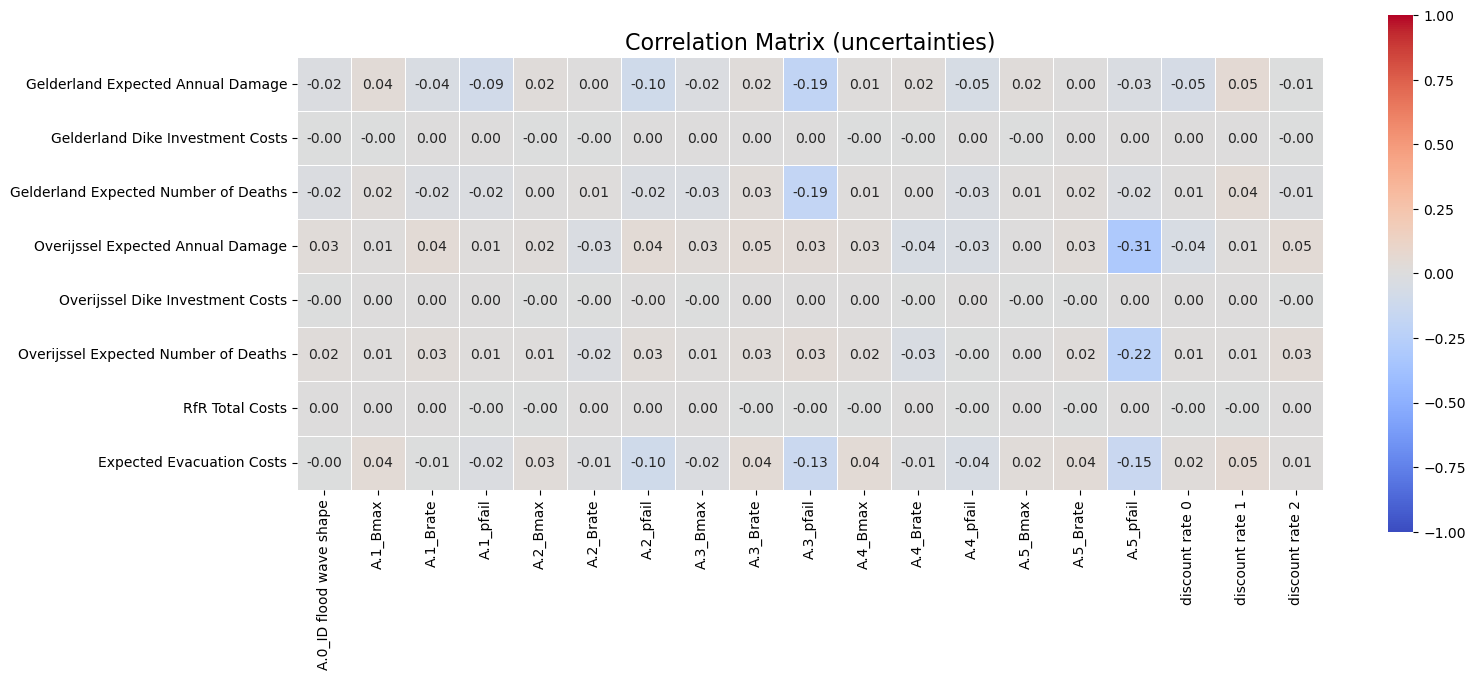

In [ ]:
correlation_matrix = results_policies.corr()




# Plot heatmap of the selected subset
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix.iloc[-8:, :19],
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix (uncertainties)", fontsize=16)
plt.tight_layout()
plt.show()

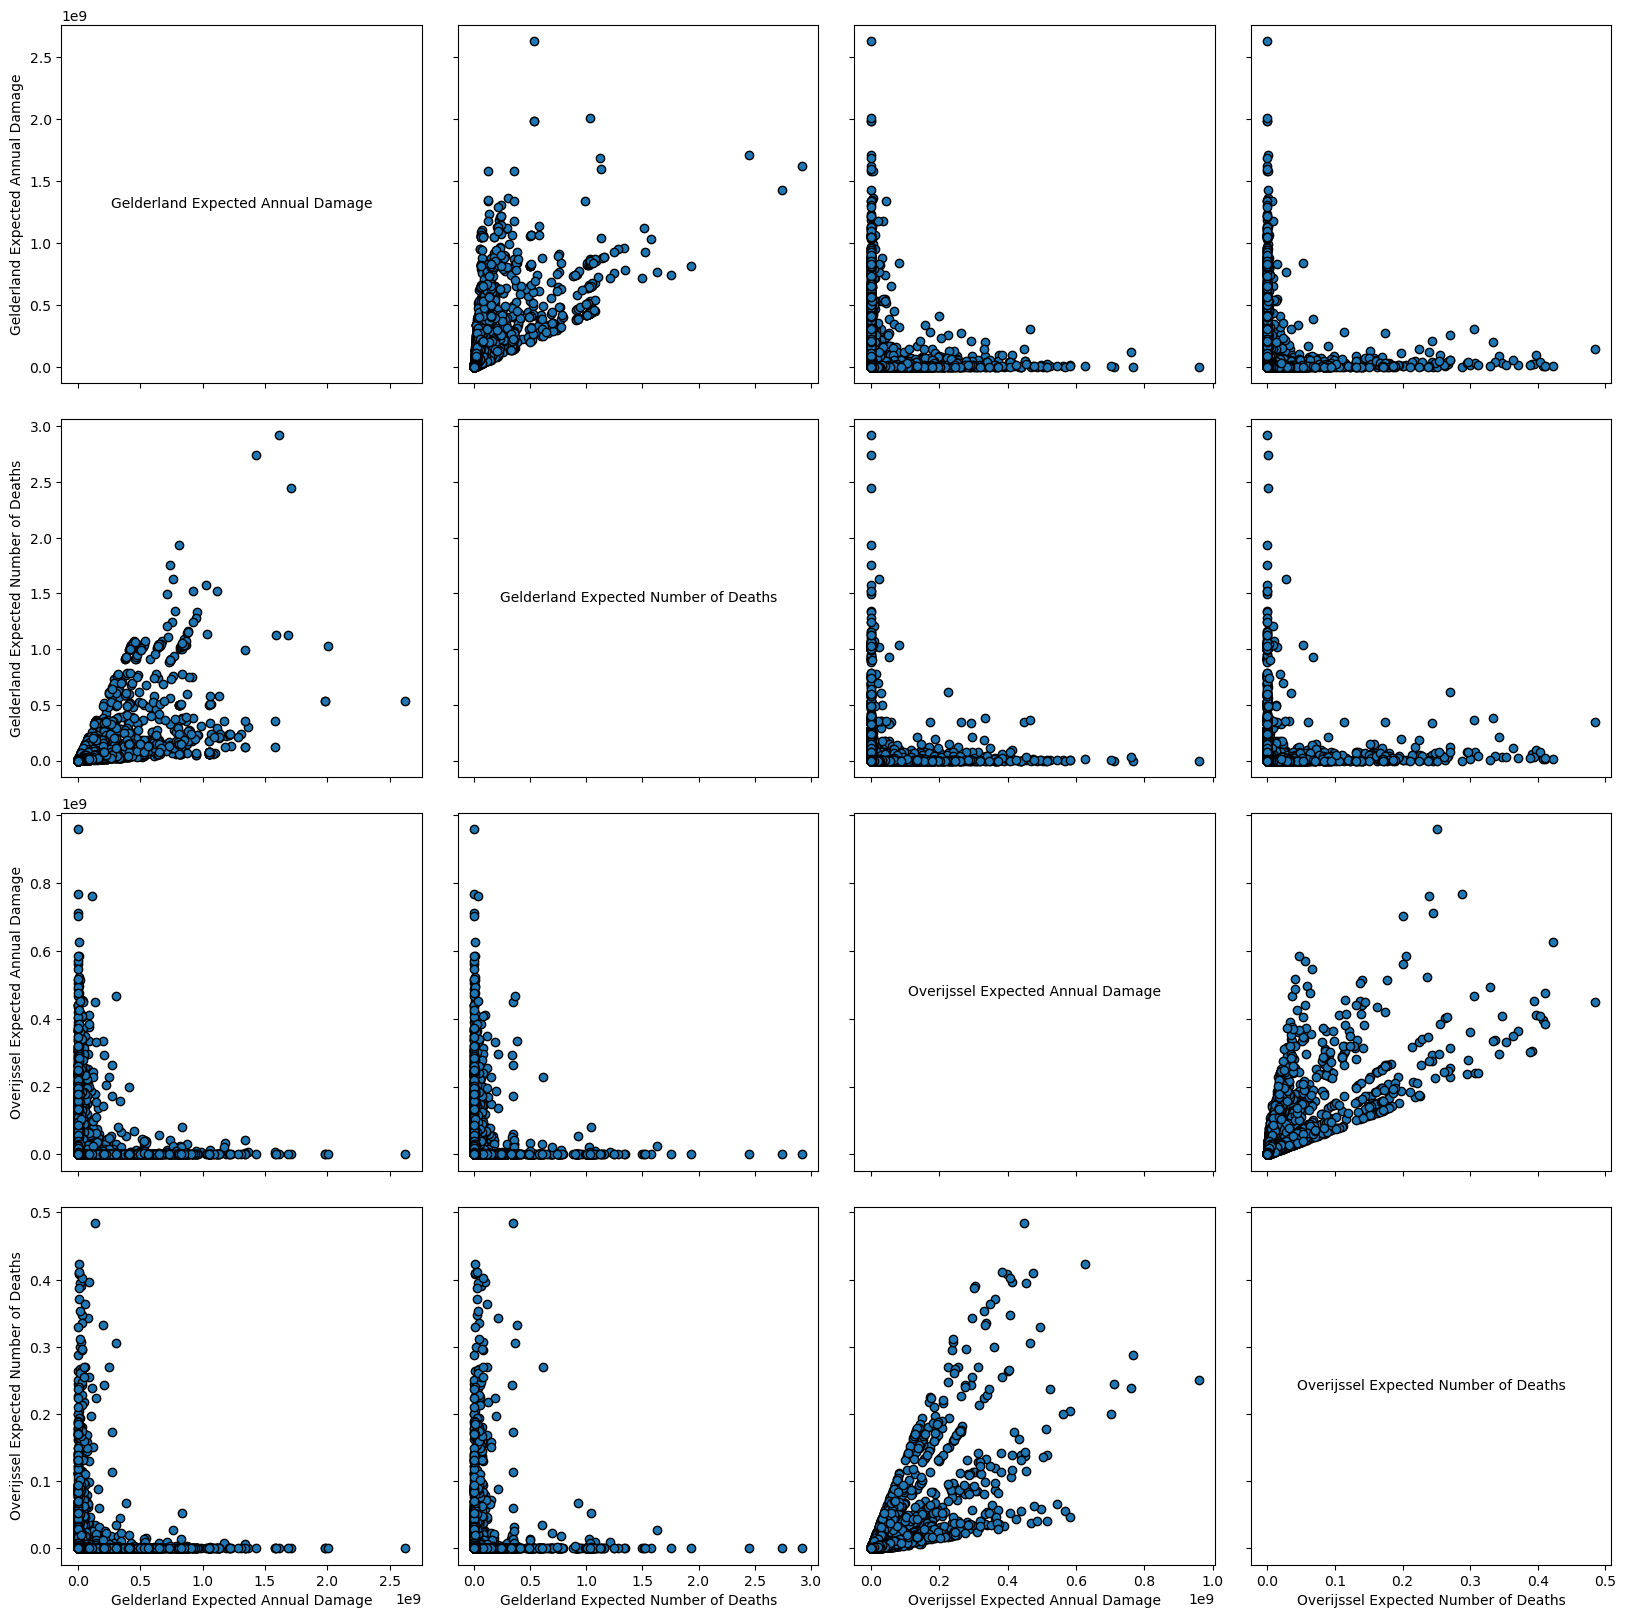

In [ ]:
from ema_workbench.analysis import pairs_plotting
# Outcomes we want to plot
selected_keys = [
    "Gelderland Expected Annual Damage",
    "Gelderland Expected Number of Deaths",
    "Overijssel Expected Annual Damage",
    "Overijssel Expected Number of Deaths"
]

# Create a new dictionary with only selected outcomes
selected_outcomes = {k: outcomes_policy[k] for k in selected_keys}

# Plotting pairs scatter plot for the selected outcomes
fig, axes = pairs_plotting.pairs_scatter(experiments_policy, selected_outcomes, legend=False)
fig.set_size_inches(20, 20)
plt.show()